# Lab 7.06 - Time series analysis

In [88]:
# Package imports for data science
import numpy as np  # Scientific computing
import scipy.stats as stats  # Statistical tests
import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

## Exercise 6: COVID-19 data


In this lab assignment, we will make use of the COVID-19 dataset maintained by [Our World in Data](https://ourworldindata.org/coronavirus), published on Github at <https://github.com/owid/covid-19-data/tree/master/public/data>.

We took a snapshot of the data on 2023-05-31 that still contains *daily* observations. Recently, the dataset has been updated to only contain weekly observations.

First, we import the dataset, parse the `date` column as the Python `DateTime` type and set this as the index.

**Tip:** The CSV file is rather large, so instead you may want to load a local copy of the CSV file to avoid downloading it multiple times ('../data/owid-covid-data-2023-05-31.csv').

In [89]:
covid19 = pd.read_csv(
    "../data/owid-covid-data-2023-05-31.csv",
    parse_dates=["date"],
    index_col=["date"],
)
covid19.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-04,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-05,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-06,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-07,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Create a new `DataFrame` (with name e.g. `covid19_be`) that only contains the new cases in Belgium and use the `plot()` method of `DataFrame` to visualize it. Increase the size of the picture with the `figsize` parameter, otherwise it will be too small.

In [90]:
df = covid19[covid19["iso_code"] == "BEL"]
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
2020-01-04,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
2020-01-05,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923.0,-151.3,-6.34,-6.34,-13.086293
2020-01-06,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
2020-01-07,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

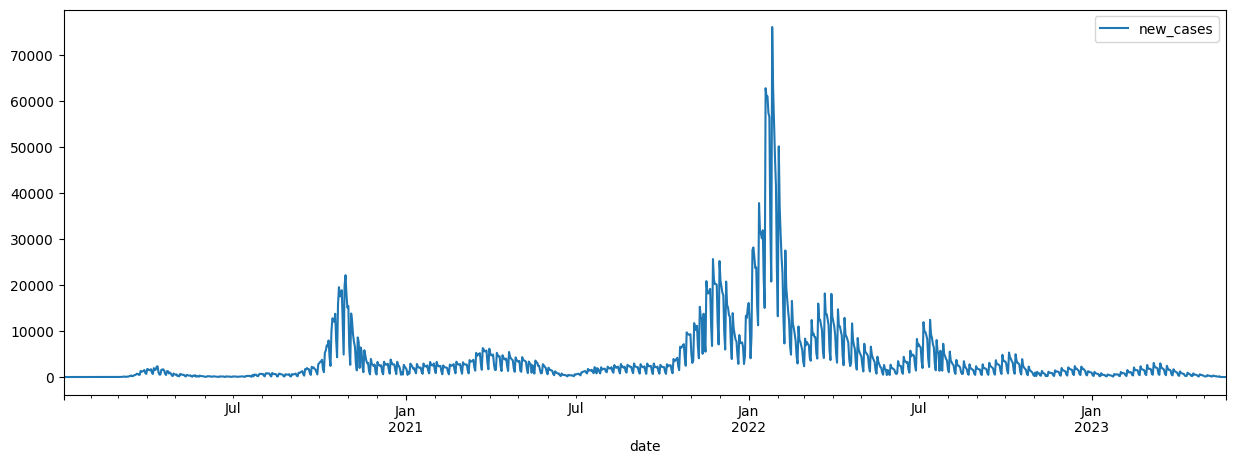

In [91]:
df.plot(y="new_cases", figsize=[15, 5])

### Moving average

Add new columns to the data frame with new cases in Belgium with the simple moving average for 7 and 30 days. Plot the entire data frame (observations and both moving averages).

C:\Users\nealj\AppData\Local\Temp\ipykernel_2560\4192496234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SMA7"] = df["new_cases"].rolling(7).mean()
C:\Users\nealj\AppData\Local\Temp\ipykernel_2560\4192496234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SMA30"] = df["new_cases"].rolling(10).mean()


<Axes: xlabel='date'>

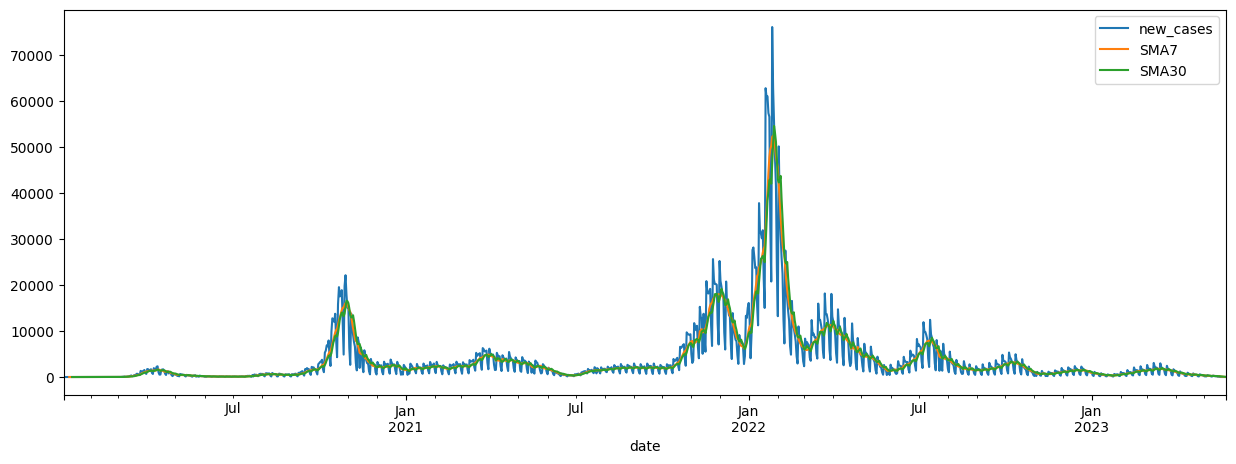

In [92]:
df["SMA7"] = df["new_cases"].rolling(7).mean()
df["SMA30"] = df["new_cases"].rolling(10).mean()
df.plot(y=["new_cases", "SMA7", "SMA30"], figsize=[15, 5])

### Holt-Winters model for new cases early 2021

The period from about December 2020 up to the end of February 2021 seems quite regular. Create a new `DataFrame` and select only the observations during that period (1 December 2020 to 28 February 2021). Plot the `DataFrame` (it will still contain the moving averages from the previous step).

<Axes: xlabel='date'>

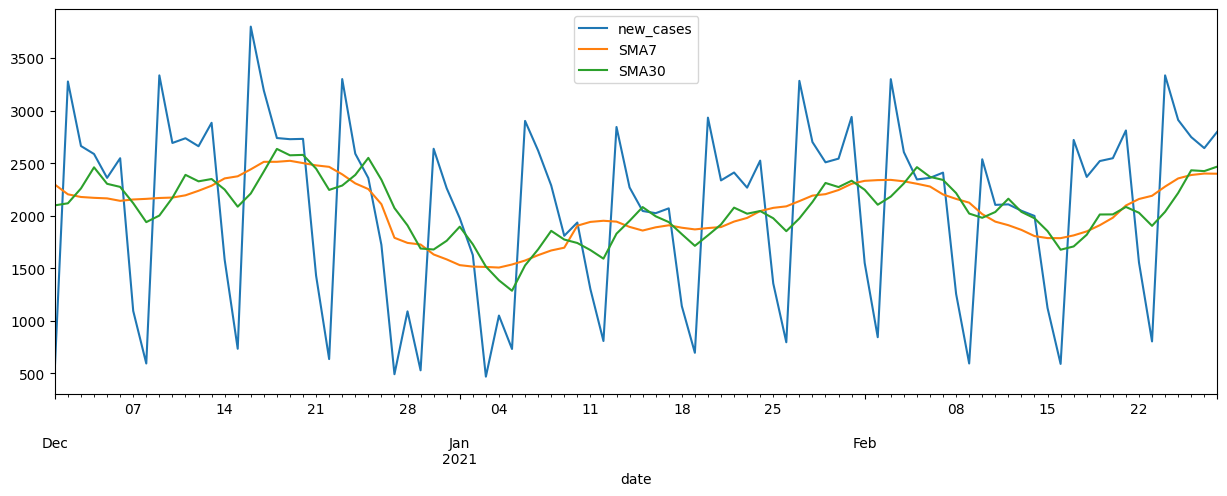

In [93]:
# df2 = df[df <= "2021-02-28"]
df2 = df["2020-12-01":"2021-02-28"]

df2.head
df2.plot(y=["new_cases", "SMA7", "SMA30"], figsize=[15, 5])



Build a Holt-Winters model for the observed new cases during that period.

Use the additive type for both trend and seasonal smoothing. Set the value for `seasonal_periods` to the appropriate value! Plot the observed and fitted values.

<Axes: xlabel='date'>

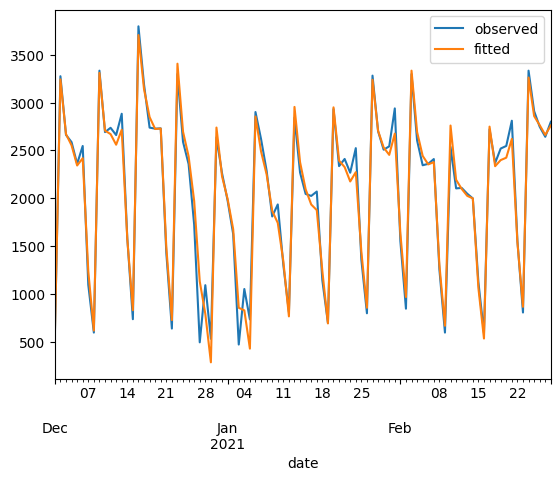

In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = df2["new_cases"]

model = ExponentialSmoothing(
    train, trend="add", seasonal="add", seasonal_periods=7, freq="D"
).fit()

train.plot(legend=True, label="observed")
# test.plot(legend=True, label="test")
(model.level + model.season).plot(legend=True, label="fitted")

Now, make a forecast for 21 days and plot observed and forecasted values. What do you notice when you compare observed and forecasted values as time progresses?

<Axes: xlabel='date'>

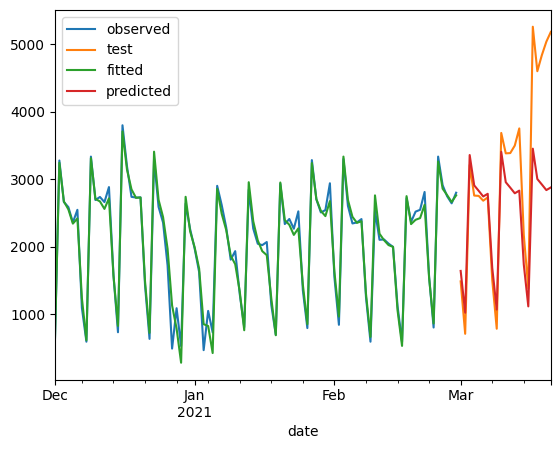

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = df2["new_cases"]
test = df["2021-03-01":"2021-03-21"]["new_cases"]

model = ExponentialSmoothing(
    train, trend="add", seasonal="add", seasonal_periods=7, freq="D"
).fit()

train.plot(legend=True, label="observed")
test.plot(legend=True, label="test")
(model.level + model.season).plot(legend=True, label="fitted")

# Predicted
new_cases_predicted = model.forecast(21)
new_cases_predicted.plot(legend=True, label="predicted")

### Evaluating model quality


- Calculate the Mean Squared Error for a forecast period of 7 days, and compare its square root with the standard deviation of observed new cases over the test period and forecasted period combined.
- Do the same for a forecast period of 14 and 21 days.
- For which period is the quality of the forecast ok?

The expected results are shown in the table below:

|     Forecast period      |         MSE |     √MSE |    stdev |
| :----------------------: | ----------: | -------: | -------: |
| 2021-03-01 to 2021-03-07 |   25408.902 |  159.402 |  855.684 |
| 2021-03-01 to 2021-03-14 |  154280.817 |  392.786 |  895.531 |
| 2021-03-01 to 2021-03-21 | 1048835.781 | 1024.127 | 1052.978 |

In [96]:
new_cases_predicted.head()

2021-03-01    1642.194562
2021-03-02    1022.570139
2021-03-03    3358.011066
2021-03-04    2908.800170
2021-03-05    2827.978207
Freq: D, dtype: float64

In [97]:
from sklearn.metrics import mean_squared_error

start = "2021-03-01"
end_periods = ["2021-03-07", "2021-03-14", "2021-03-21"]

for end in end_periods:
    mse = mean_squared_error(test[start:end], new_cases_predicted[start:end])

    print(f"Period = {start} to {end}")
    print(f"MSE = {mse}")
    print(f"sqrt(MSE) = {np.sqrt(mse)}")

    # merged = test[start:end].append(new_cases_predicted[start:end])
    # print(merged)

    # print(f"stdev = {np.std(merged, ddof=1)}")
    print()

Period = 2021-03-01 to 2021-03-07
MSE = 25408.90161016752
sqrt(MSE) = 159.40169889360502

Period = 2021-03-01 to 2021-03-14
MSE = 154280.81707120585
sqrt(MSE) = 392.78596852637935

Period = 2021-03-01 to 2021-03-21
MSE = 1048835.7806246676
sqrt(MSE) = 1024.1268381527102



### ICU patients

Create a new `DataFrame` with only the total number of ICU (intensive care units) patients in the Belgian hospitals. Make sure that all NaN's are removed, since time series analysis functions can't cope with missing values. Plot this time series. 

In [125]:
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,SMA7,SMA30
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,5.64,81.63,0.931,11655923.0,-151.3,-6.34,-6.34,-13.086293,NaN,NaN
2020-01-06,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,BEL,Europe,Belgium,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\nealj\AppData\Local\Temp\ipykernel_2560\1465000584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu.dropna(inplace=True)


<Axes: xlabel='date'>

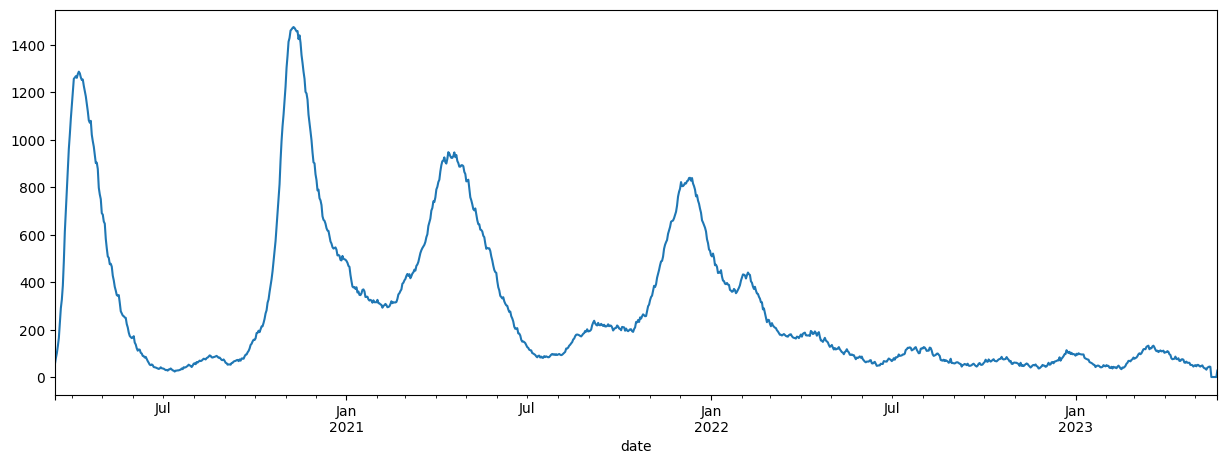

In [127]:
icu = df["icu_patients"]
icu.dropna(inplace=True)
icu.plot(figsize=[15, 5])

Build a duible exponential smoothing (Holt) model of this time series. Make a forecast of 70 time units and plot the observations, fitted values and forecast.

Are we currently in an upward or downward trend, according to this model? Do the forecasted values seem reasonable if you look at the last period?

In [128]:
icu.head()

date
2020-03-15     53.0
2020-03-16     79.0
2020-03-17    100.0
2020-03-18    130.0
2020-03-19    164.0
Name: icu_patients, dtype: float64

In [129]:
from statsmodels.tsa.api import Holt

icu_des = Holt(icu).fit()

icu["DES"] = icu_des.level
icu.head()

c:\Users\nealj\Documents\School\dsai-labs\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nealj\AppData\Local\Temp\ipykernel_2560\441893093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu["DES"] = icu_des.level
C:\Users\nealj\AppData\Local\Temp\ipykernel_2560\441893093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu["DES"] = icu_des.level


date
2020-03-15 00:00:00     53.0
2020-03-16 00:00:00     79.0
2020-03-17 00:00:00    100.0
2020-03-18 00:00:00    130.0
2020-03-19 00:00:00    164.0
Name: icu_patients, dtype: object

In [ ]:
icu.plot(y=["number_of_heavily_wounded", "DES"], figsize=[10, 5])

Since we didn't set any initial parameters like $\alpha$ and $\beta$, the model calculated them using some rule of thumb. List these parameters from the model:

What were the final estimated values for the level and trend, that are used in the forecast? In other words, what are the parameters of the line that estimates future observations?

Let's try to set the parameters ourselves. Recreate the Holt-model with $\alpha = \beta = 0.1$. Calculate a forecast like before and plot.

Compare the model parameters and final estimates. Which of the two forecast models seems to perform best if you look at the plots?